<a href="https://colab.research.google.com/github/sneezedsherry/DataVisualization/blob/master/barplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 5.0MB/s 


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [0]:
downloaded = drive.CreateFile({'id':'1s04DN96LISkHZ97e2_1pLbRxglhKx_CZ'}) 
downloaded.GetContentFile('MusicSales2.csv') 

In [4]:
df = pd.read_csv('MusicSales2.csv')
df.shape

(2143, 25)

In [0]:
df.head(1)

,Album,Artist,Bytes,Sales,City,Company,Composer,Country,CustomerID,Email,...,MediaType,Milliseconds,Number of Records,Phone,PostalCode,Quantity,Region,State,Track,UnitPrice
0,Balls to the Wall,Accept,5.51M,3.96,Stuttgart,NaN,NaN,Germany,2,leonekohler@surfeu.de,...,Protected AAC audio file,342562,1,+49 0711 2842222,70174,4,Europe,NaN,Balls to the Wall,0.99


## Most popular genre in Europe and Asia.

In [0]:
df_EA=df[df['Region'].isin(['Europe', 'Asia'])].copy()

In [6]:
df_EA.shape

(1089, 25)

In [0]:
df_genre = df_EA.groupby(['Genre'])['Quantity'].sum().reset_index()
df_genre.sort_values(by=['Quantity'], ascending=False, inplace=True)

In [8]:
df_genre.head()

,Genre,Quantity
17,Rock,1284
12,Latin,472
1,Alternative & Punk,401
13,Metal,366
11,Jazz,108


Text(1000, 3.5, 'Top Selling Genre: Rock\nQuantity Sold: 1,284')

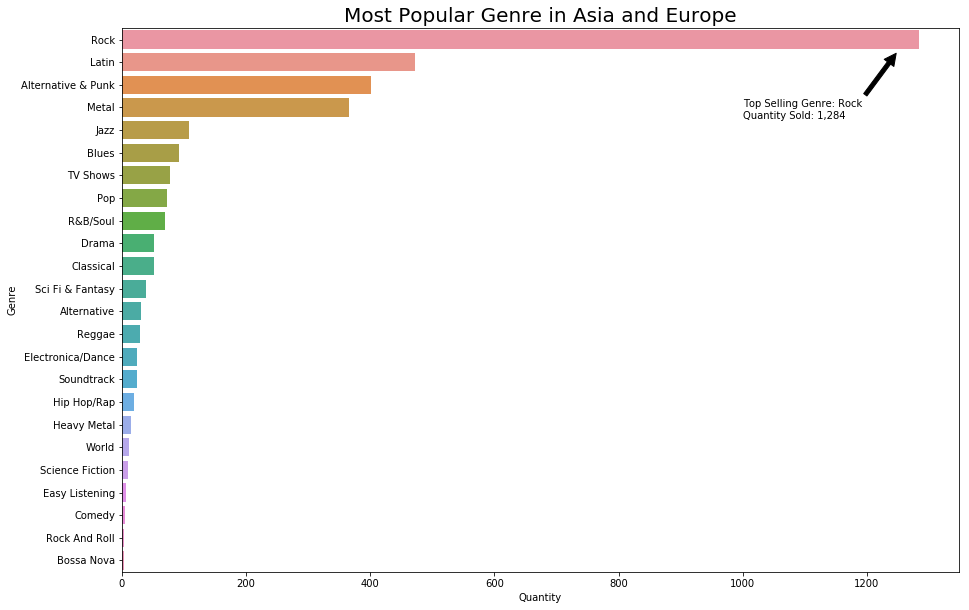

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
ax = fig.gca()
sns.barplot(y='Genre', x='Quantity', data=df_genre, ax=ax)
ax.set_title('Most Popular Genre in Asia and Europe', size=20)
ax.annotate('Top Selling Genre: Rock\nQuantity Sold: 1,284', 
            xy = (1250,0.5), xytext=(1000,3.5), arrowprops=dict(facecolor='black', shrink=0.05))

## Top 20 Artists in Europe and Asia.

In [0]:
# get the rank of artists by quantity
df_rank = df_EA.groupby(['Artist'])['Quantity'].sum().reset_index()
df_rank['Rank'] = df_rank['Quantity'].rank(method='dense', ascending=False) 

In [0]:
# get the quantity by artists and genre
# append the rank of artists
df_rank_genre = df_EA.groupby(['Artist', 'Genre'])['Quantity'].sum().reset_index()
df_rank_genre=pd.merge(df_rank_genre, df_rank[['Artist', 'Rank']], on='Artist', how='left')
df_rank_genre.sort_values(by='Rank', inplace=True)

In [12]:
df_rank_genre.head()

,Artist,Genre,Quantity,Rank
72,Iron Maiden,Blues,9,1.0
73,Iron Maiden,Heavy Metal,15,1.0
74,Iron Maiden,Metal,120,1.0
75,Iron Maiden,Rock,79,1.0
166,U2,Rock,131,2.0


In [0]:
# reformat for plotting
df_top20 = df_rank_genre.loc[df_rank_genre['Rank'] <= 20, ['Artist', 'Genre', 'Quantity']].pivot(columns='Genre',index='Artist',values='Quantity')
df_top20['total'] = df_top20.sum(axis=1)
df_top20.sort_values(by=['total', 'Artist'], ascending=[True, False], inplace=True)
# df_top20.drop('total', axis=1, inplace=True)

In [0]:
df_top20.head()

Text(0.5, 0, 'Quantity')

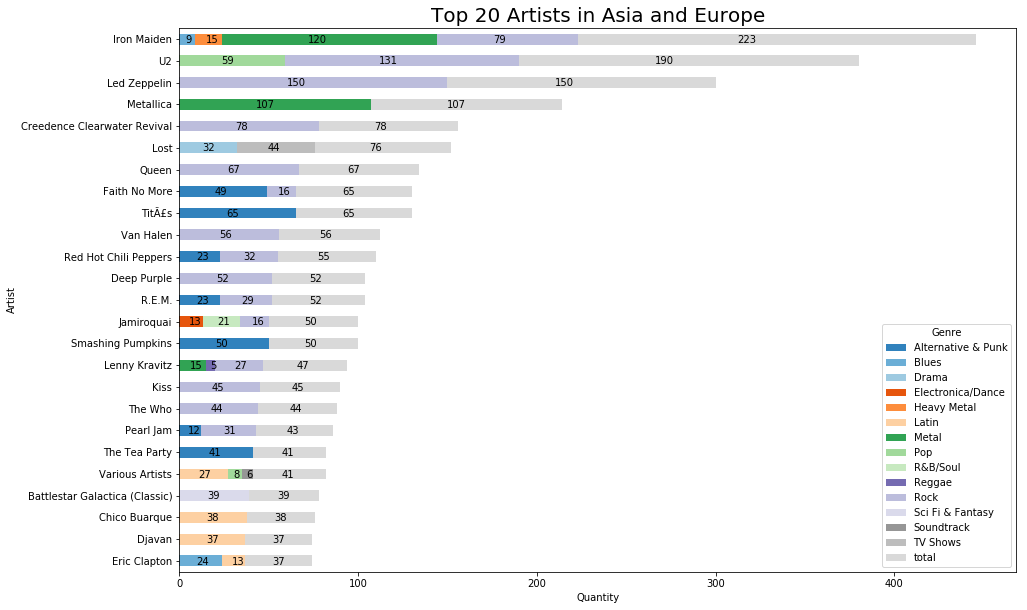

In [14]:
ax = df_top20.plot.barh(stacked=True, figsize=(15, 10), cmap=plt.cm.get_cmap('tab20c'))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if width > 0:
        ax.annotate(f'{width:.0f}', (p.get_x()+0.40*width,
                                     p.get_y()+.17*height), color='black', fontsize=10)
plt.title('Top 20 Artists in Asia and Europe', size=20)
plt.xlabel('Quantity')

## Rock vs. Alternative and Punk vs. Heavy Metal.

In [0]:
# format date to month
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate_year_month'] = pd.to_datetime(df['InvoiceDate']).dt.strftime("%Y-%m")

In [0]:
# subset the data needed for the plot
df_3genres=df[df['Genre'].isin(['Alternative & Punk','Heavy Metal', 'Rock'])]

In [17]:
df_3genres.shape

(1039, 26)

In [0]:
df_3genres.head()

In [0]:
# get the summary
df_3genres_summary = df_3genres.groupby(['Genre', 'InvoiceDate_year_month'])['Sales'].sum().reset_index()

In [0]:
# set the template
t = pd.date_range('2008-01-01', '2012-12-31', freq='MS')
order=list(np.arange(60))*3

df_3genres_template=pd.DataFrame(list(itertools.product(['Rock','Alternative & Punk','Heavy Metal'], t)), 
                                 columns=['Genre', 'InvoiceDate'])
df_3genres_template['order']=order
df_3genres_template['InvoiceDate_year_month'] = pd.to_datetime(df_3genres_template['InvoiceDate']).dt.strftime("%Y-%m")

In [0]:
# merge the summary with the template
df_3genres_summary = pd.merge(df_3genres_template, df_3genres_summary, 
                               on=['Genre', 'InvoiceDate_year_month'], how='left')

In [21]:
df_3genres_summary.head()

,Genre,InvoiceDate,order,InvoiceDate_year_month,Sales
0,Rock,2008-01-01,0,2008-01,55.44
1,Rock,2008-02-01,1,2008-02,13.86
2,Rock,2008-03-01,2,2008-03,22.77
3,Rock,2008-04-01,3,2008-04,57.42
4,Rock,2008-05-01,4,2008-05,25.74


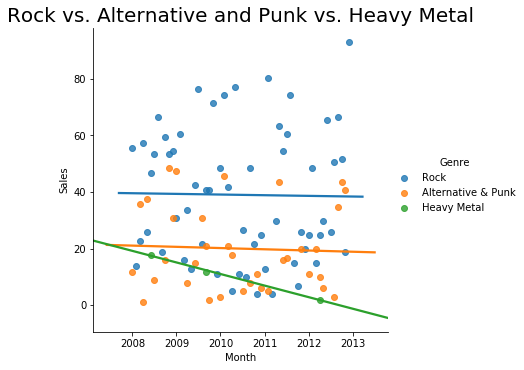

In [22]:
plt.rcParams['figure.figsize'] = (10, 10)
ax=sns.lmplot(x='order', y='Sales', hue='Genre', data=df_3genres_summary, ci=None)
plt.title('Rock vs. Alternative and Punk vs. Heavy Metal', size=20)
plt.xlabel('Month')
ax.set(xticks=np.arange(0,71,12), xticklabels=[2008, 2009, 2010, 2011, 2012, 2013])